## Abstract: 
The aim of this post was to create a model that predicts a penguin's species based on both quantitative and qualitative data. Personally, this post demonstrates my ability to work with and manipulate dataframes in Pandas, create visualizations using seaborn, choose effective features, and build an effective model. 
My model uses Culmen Depth, Culmen Length and the island of inhabitants of the penguins in the Palmer Penguin data set to predict the species of the penguin. I used a brute force tactic to choose these three features: iterating through every combination of features and fitting a logistic regression to each combination. I compared the mean cross validation scores for each combination and chose the three features with the highest score. 
I displayed the results of my model on both the test and training data, showing the prediction areas produced by the features. 

## Explore:
Please create two interesting visualizations of the data, and one summary table (e.g. compute the average or median value of some features, by group). Your visualizations and table should:

1. Include axis labels and legends.
2. Help you draw conclusions about what features you are going to try using for your model.
3. Be accompanied by discussion of what you learned and how you will use it in modeling. Most figures and tables are worth at least one short paragraph of discussion.

In [1]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


Importing the Palmer Penguin Dataset. 

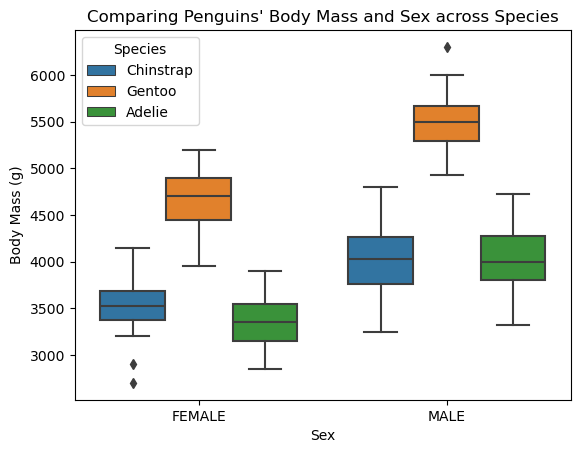

In [2]:
import seaborn as sns

df1 = train[["Sex","Body Mass (g)", "Species"]]
df1 = df1.drop(df1[df1["Sex"] == "."].index)
df1["Species"] = df1["Species"].str.split().str.get(0)
df1 = df1.dropna()

p1 = sns.boxplot(df1, x = "Sex", y = "Body Mass (g)", hue = "Species").set_title("Comparing Penguins' Body Mass and Sex across Species")

I created a new data frame with the the Sex, Body Mass, and Species columns. I removed the penguins with the third sex (not male or female) because there were not enough specimens with this sex to make an impact on this visualization. Further, I dropped all of the rows with NA values for any of these features. I then created a boxplot with Sex on the X-axis and Body Mass on the Y-axis with the individual boxplots separated by species. 
This plot shows that the average body mass of all species is greater for male penguins compared to females. Further, (and important for feature selection) it shows the similarities between body mass between the Chinstrap and Adelie species.

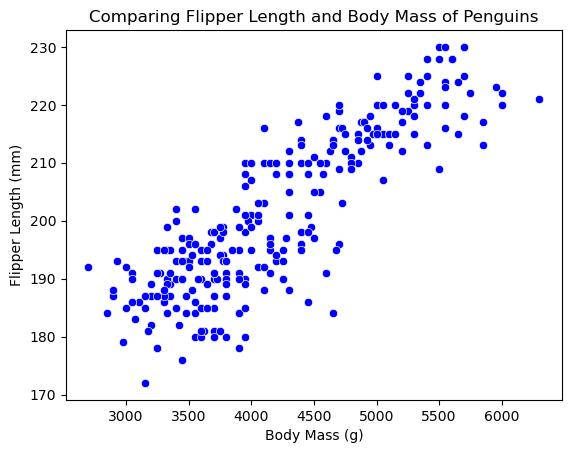

In [3]:
df2 = train[["Body Mass (g)", "Flipper Length (mm)"]]
df2 = df2.dropna()

p2 = sns.scatterplot(df2, x = "Body Mass (g)", y = "Flipper Length (mm)", color = "blue").set_title("Comparing Flipper Length and Body Mass of Penguins")

I created another data frame (dropping the NA values again) including the body mass and flipper length features. 
I displayed these features using a scatter plot. This visualization shows that there is a positive correlation between body mass and flipper length among all the penguins in the data. 

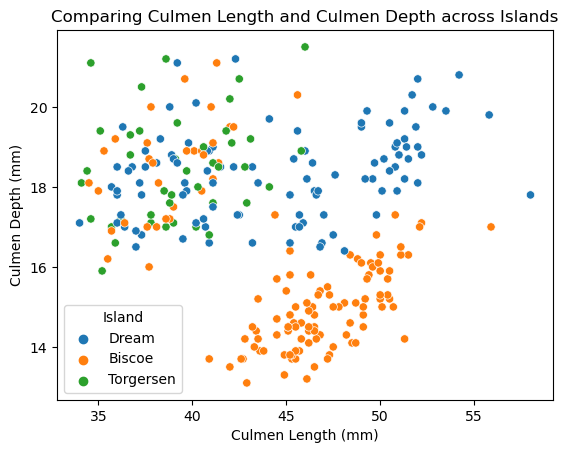

In [4]:
df3 = train[["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]]
df3 = df3.dropna()

p3 = sns.scatterplot(df3, x = "Culmen Length (mm)", y = "Culmen Depth (mm)", hue="Island").set_title("Comparing Culmen Length and Culmen Depth across Islands")

For my final visualization, I created another data frame that included the culmen length, culmen depth, and island features. 
This visualization shows that particular ranges of culmen length and depth could be associated with different islands. For example, generally, penguins with culmen depth under 16 mm and culmen length over 43 mm belong to the Biscoe island. 

In [5]:
df4 = train[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"]]
df4.groupby("Sex").aggregate('mean')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Sex,,,,
.,44.500000,15.700000,217.000000,4875.000000
FEMALE,42.551128,16.371429,198.067669,3882.330827
MALE,45.463359,17.993130,203.687023,4521.755725


I created this summary table by grouping the penguins and sex and aggregating the culmen length, culmen depth, flipper length, and body mass features by their mean values. 
Through this table, the differences in these quantitative values between sexes. 

## Model:

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


Preparing the qualitative columns in the dataset and removing the Species column. I also removed the other identifying columns for the penguins and removed the third sex (not female or male) because there are a small number of penguins with this sex. I also one hot encoded the categorical feature columns. 

In [7]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

all_qual_cols = ["Clutch Completion", "Sex", "Stage_Adult, 1 Egg Stage", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]
max_cv_score = 0
max_cols = []
for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    LR = LogisticRegression(max_iter=10000)
    LR.fit(X_train[cols], y_train)
    cv_scores = cross_val_score(LR,X_train[cols],y_train,cv = 10)
    cv_score_mean = cv_scores.mean()
    if cv_score_mean > max_cv_score:
      max_cv_score = cv_score_mean
      max_cols = cols
max_cols

['Island_Biscoe',
 'Island_Dream',
 'Island_Torgersen',
 'Culmen Length (mm)',
 'Culmen Depth (mm)']

I split the features into the quantitative columns and the qualitative columns. Next, for every qualitative feature, I iterated through every combination of two quantitative features. For each of these combinations of one qualitative and two quantitative features, I fit a logistic regression model and calculated the mean cross evaluation score over ten folds. I kept track of the greatest mean cross evaluation score and found that Culmen Length, Culmen Depth, and Island performed best. 

In [17]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
max_cols.reverse()

X_test, y_test = prepare_data(test)
LR.fit(X_train[max_cols], y_train)
LR.score(X_test[max_cols], y_test)

1.0

I imported the test data, and fit a logistic regression on the training data with the columns that performed the best in the training data. I then scored the model using the testing data and found that it performed to 100% accuracy.  

In [9]:
from matplotlib import pyplot as plt
import numpy as np

In [10]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

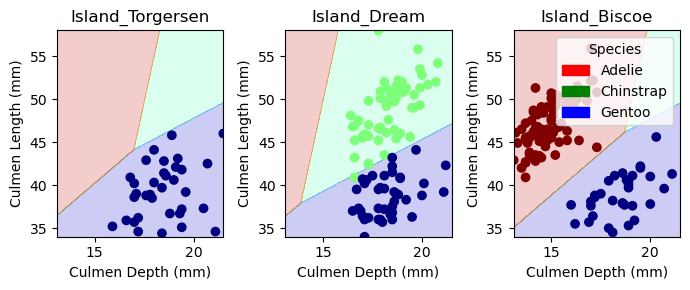

In [11]:
plot_regions(LR, X_train[max_cols], y_train)

This plot shows the prediction regions for my logistic regression model. As shown in the plot, the model uses culmen length and depth and island of inhabitants to make it's predictions. The training data is shown in this visualization 

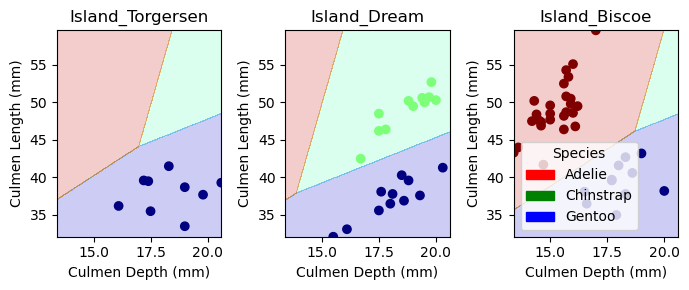

In [12]:
plot_regions(LR, X_test[max_cols], y_test)

The plot above uses the test data instead of the training data over the same variables. As shown in the plot, the model performed with one hundred percent accuracy for the test data. 

In [13]:
from sklearn.metrics import confusion_matrix

y_test_pred = LR.predict(X_test[max_cols])
C = confusion_matrix(y_test,y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

The above confusion matrix shows that all of the Adelie penguins were classified as Adelie penguins, all of the Chinstrap penguins were classified as Chinstrap penguins, and all of the Gentoo penguins were classified as Gentoo. 

## Discussion:
Through the use of an exhaustive feature search and cross validation, I created a model that uses culmen depth, culmen length, and the island of inhabitants to predict the species of the penguin. My model performed with 99.6 percent accuracy in the training data with a cross validation score of 99.6 percent as well, and performed with one hundred percent accuracy in the test data.

Through this process of completing this process I improved my skills with pandas data frames and fitting linear regression models. I also learned about feature selection. I experimented with multiple tools in the scikit learn database (VarianceThreshold, SelectKBest, etc.), but I didn't end up using any of these tools for my selection. I learned how to test every combination of features and practiced my skills with cross validation on each of these combinations. 